# Project 4: Poisonous Mushrooms

**Solution**

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

## Grading
---
- Make sure to answer every part in every question.
 - There are 6 equally weighted questions.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean and well commented, 
   - and if the functions or answers are too long.

 ## Requirements:
---
1. Comment your code.
1. All graphs should have titles, label for each axis, and if needed a legend. It should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning keep things in functions).

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


Load feature names.

### Question 1:PCA and fraction of total variance
---

1. Do a principal components analysis on the data.
1. Print what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].
1. Show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.
1. You only need to call PCA.fit once.

Notes:
* The pandas DataFrame [cumsum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html) function may be helpful.
* You can use `PCA` to produce a PCA analysis.

Components     Fraction of total variance
----------     --------------------------
    1                  0.16404
    2                  0.29728
    3                  0.39901
    4                  0.46965
    5                  0.50831
   10                  0.65221
   20                  0.80897
   30                  0.89855
   40                  0.95093
   50                  0.9821



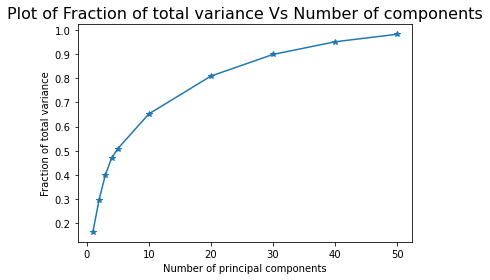

In [5]:
def P1():
    ## STUDENT START ###
    pca = PCA() # init the PCA structure
    pca.fit_transform(train_data) # fit the train data with transformation
    var_cumulative = pca.explained_variance_ratio_.cumsum() # get the cumulative sum of variance
    
    num_comp = [i for i in range(1, 6)] # generate the number of components list
    for i in range(1, 6):
        num_comp.append(i*10)
    
    var_by_comp = [] # init the list to hold variance by components
    
    print("Components     Fraction of total variance")
    print("----------     --------------------------")
    
    for k in num_comp:
        val = float(var_cumulative[k-1])
        var_by_comp.append(val)
        if k >= 10: # to allows formatted output; compensate foe 2 digits
            print("  ", k, "                ", round(val, 5))
        else:
            print("   ", k, "                ", round(val, 5))
            
    print()
    
    plt.plot(num_comp, var_by_comp, '*-')
    plt.xlabel("Number of principal components")    
    plt.ylabel("Fraction of total variance")
    plt.title("Plot of Fraction of total variance Vs Number of components", fontsize=16)
    plt.show()    
    ## STUDENT END ###

P1()

### Question 2: PCA for visualization

PCA can be very useful for visualizing data. 
1. Project the training data down to 2 dimensions and show as a square scatterplot.
  - Show poisonous examples (labeled 1) in red and non-poisonous examples in green (labeled 0)
  - Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.
* Be sure to add a title, axis labels and a legend to your graph.

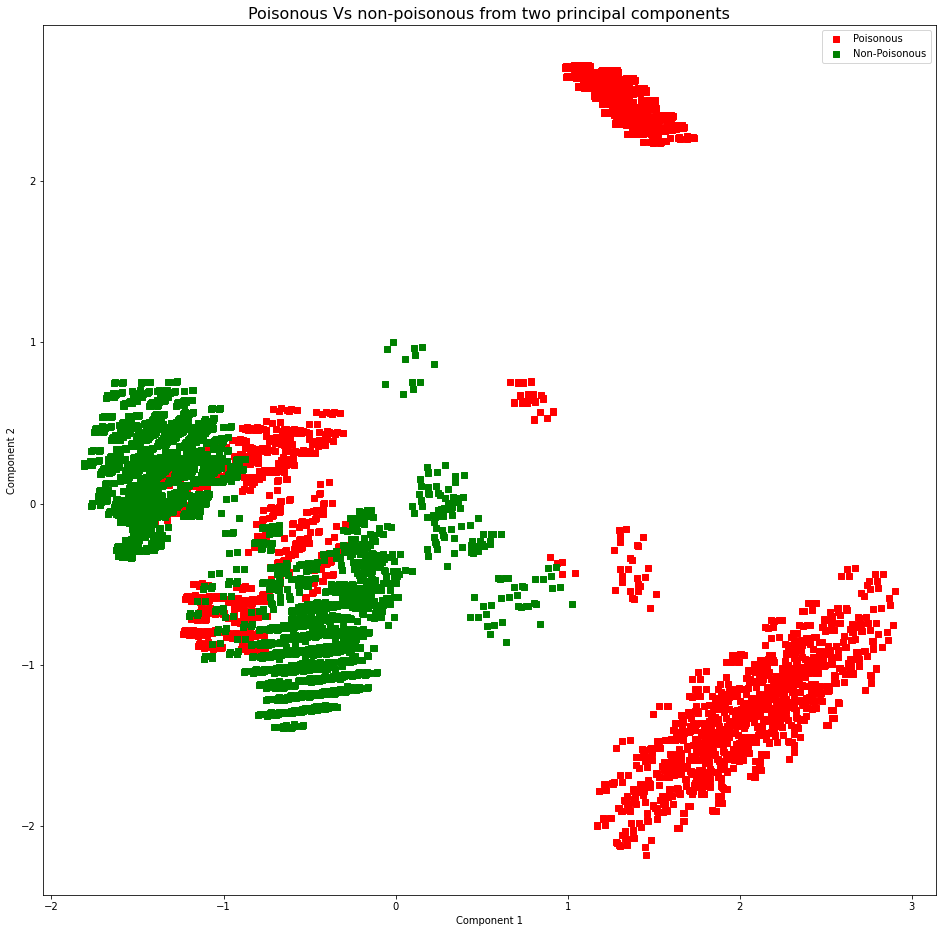

In [6]:
def Q2():   
    ### STUDENT START ###\
    pca = PCA(n_components=2)
    comp_res = pca.fit_transform(train_data)
    
    # comp_res is a 7000 row, 2 col array. For each mushroom sample the values of components 1
    # and 2 are respectively in columns 1 and 2. To plot, we take each column and consider all
    # the values corresponding to indices of label values of 1 to get poisonous mushroom. Do 
    # the same for non-poisonous mushroom (indices of label value of 0).
    plt.figure(figsize=(16, 16))
    plt.scatter(comp_res[train_labels==1,0], comp_res[train_labels==1,1], color="r", marker='s')
    plt.scatter(comp_res[train_labels==0,0], comp_res[train_labels==0,1], color="g", marker='s')
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title("Poisonous Vs non-poisonous from two principal components", fontsize=16)
    plt.legend(['Poisonous', 'Non-Poisonous'])
    plt.show()    
    ### STUDENT END ###

Q2()

### Question 3: Visualizing GMMs
---

1. Fit a k-means cluster model with 6 clusters over the 2d projected data. 
  - As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  
  - For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

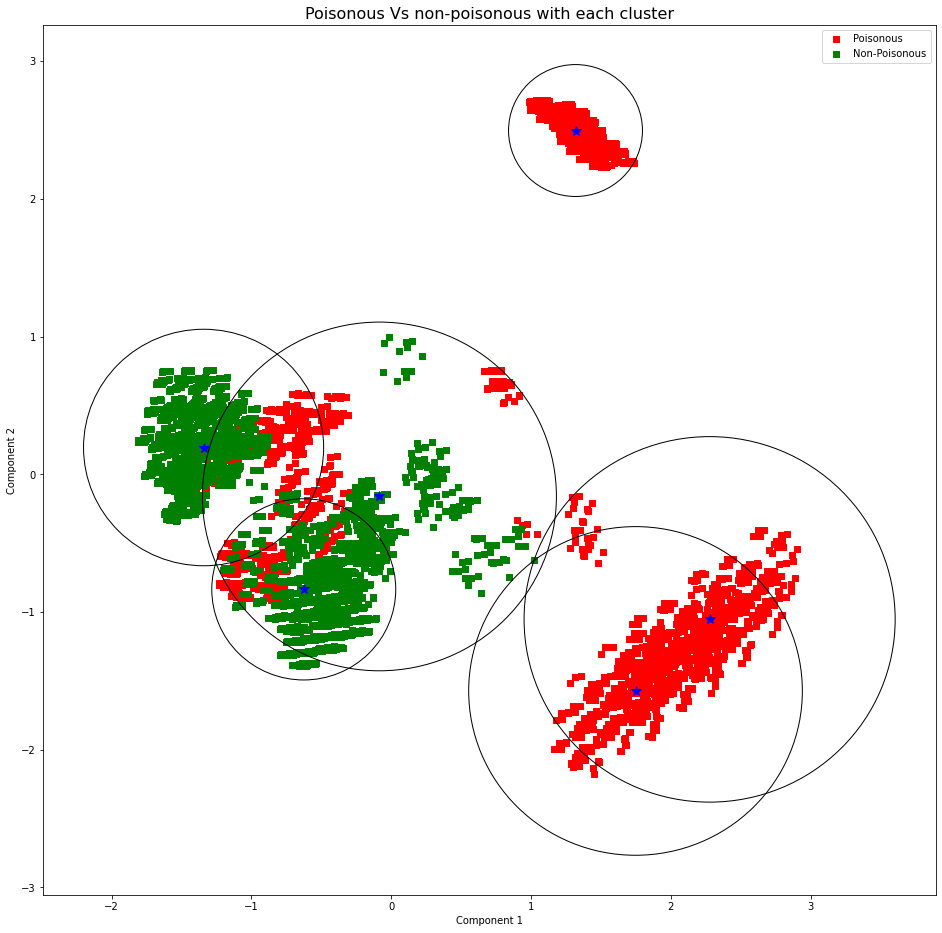

In [7]:
def Q3():   
    ### STUDENT START ###
    pca = PCA(n_components=2)
    comp_res = pca.fit_transform(train_data)
    
    plt.figure(figsize=(16, 16))
    plt.scatter(comp_res[train_labels==1,0], comp_res[train_labels==1,1], color="r", marker='s')
    plt.scatter(comp_res[train_labels==0,0], comp_res[train_labels==0,1], color="g", marker='s')
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title("Poisonous Vs non-poisonous with each cluster", fontsize=16)
    plt.legend(['Poisonous', 'Non-Poisonous'])
    
    num_clusters = 6
    km = KMeans(n_clusters=num_clusters, init='random', random_state=0)
    y_km = km.fit(comp_res) # fit K-Means on the reduced 2-component model
    cluster_centers = y_km.cluster_centers_ # get 6 centers, one for each cluster
    cluster_index = km.fit_predict(comp_res) # cluster id for each point/row (2-tuple)
    
    # mark the centroid with a blue star
    plt.plot(cluster_centers[:,0], cluster_centers[:,1], 'b*', markersize = 10)
    
    axes = plt.gca()
    
    for cluster in range(num_clusters):
        center = cluster_centers[cluster, :] # get the cluster for that cluster
        members = comp_res[cluster_index==cluster, :] # get all cluster members
        radius = 0.0
        for member in members: # for all members of the cluster
            vec = np.subtract(member, center) # get the vector from center 
            dist_from_center = np.linalg.norm(vec) # get the length of the vector
            if radius < dist_from_center: # check if it's the farthest point so far
                radius = dist_from_center # if so, make that the length radius
        axes.add_patch(plt.Circle(center, radius, fill=False))
        
    plt.show()
    ### STUDENT END ###

Q3()

### Question 4: Understanding GMMs with Density Plots
---

1. Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. 
  - Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  
  - Show a 4x4 grid of square-shaped plots of the estimated density contours. 
    - Each row showing a different number of mixture components. 
    - Each column showing a different convariance matrix type.  
1. Be sure to add a title for each plot in the grid to indicate what parameters were used.
1. How are the covariance types 'tied' and 'full' different? How do you see it in the plots?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

/var/folders/62/fbmqm0n90ns3wsvd35g9bl680000gn/T/ipykernel_20141/1387060829.py:34: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contourf(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
/var/folders/62/fbmqm0n90ns3wsvd35g9bl680000gn/T/ipykernel_20141/1387060829.py:34: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contourf(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
/var/folders/62/fbmqm0n90ns3wsvd35g9bl680000gn/T/ipykernel_20141/1387060829.py:34: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contourf(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
/var/folders/62/fbmqm0n90ns3wsvd35g9bl680000gn/T/ipykernel_20141/1387060829.py:34: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contourf(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
/var/folders/62/fbmqm0n90ns3wsvd35g9bl680000gn/T/ipykernel_20141/1387060829.py:34: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contourf(X, Y, Z, no

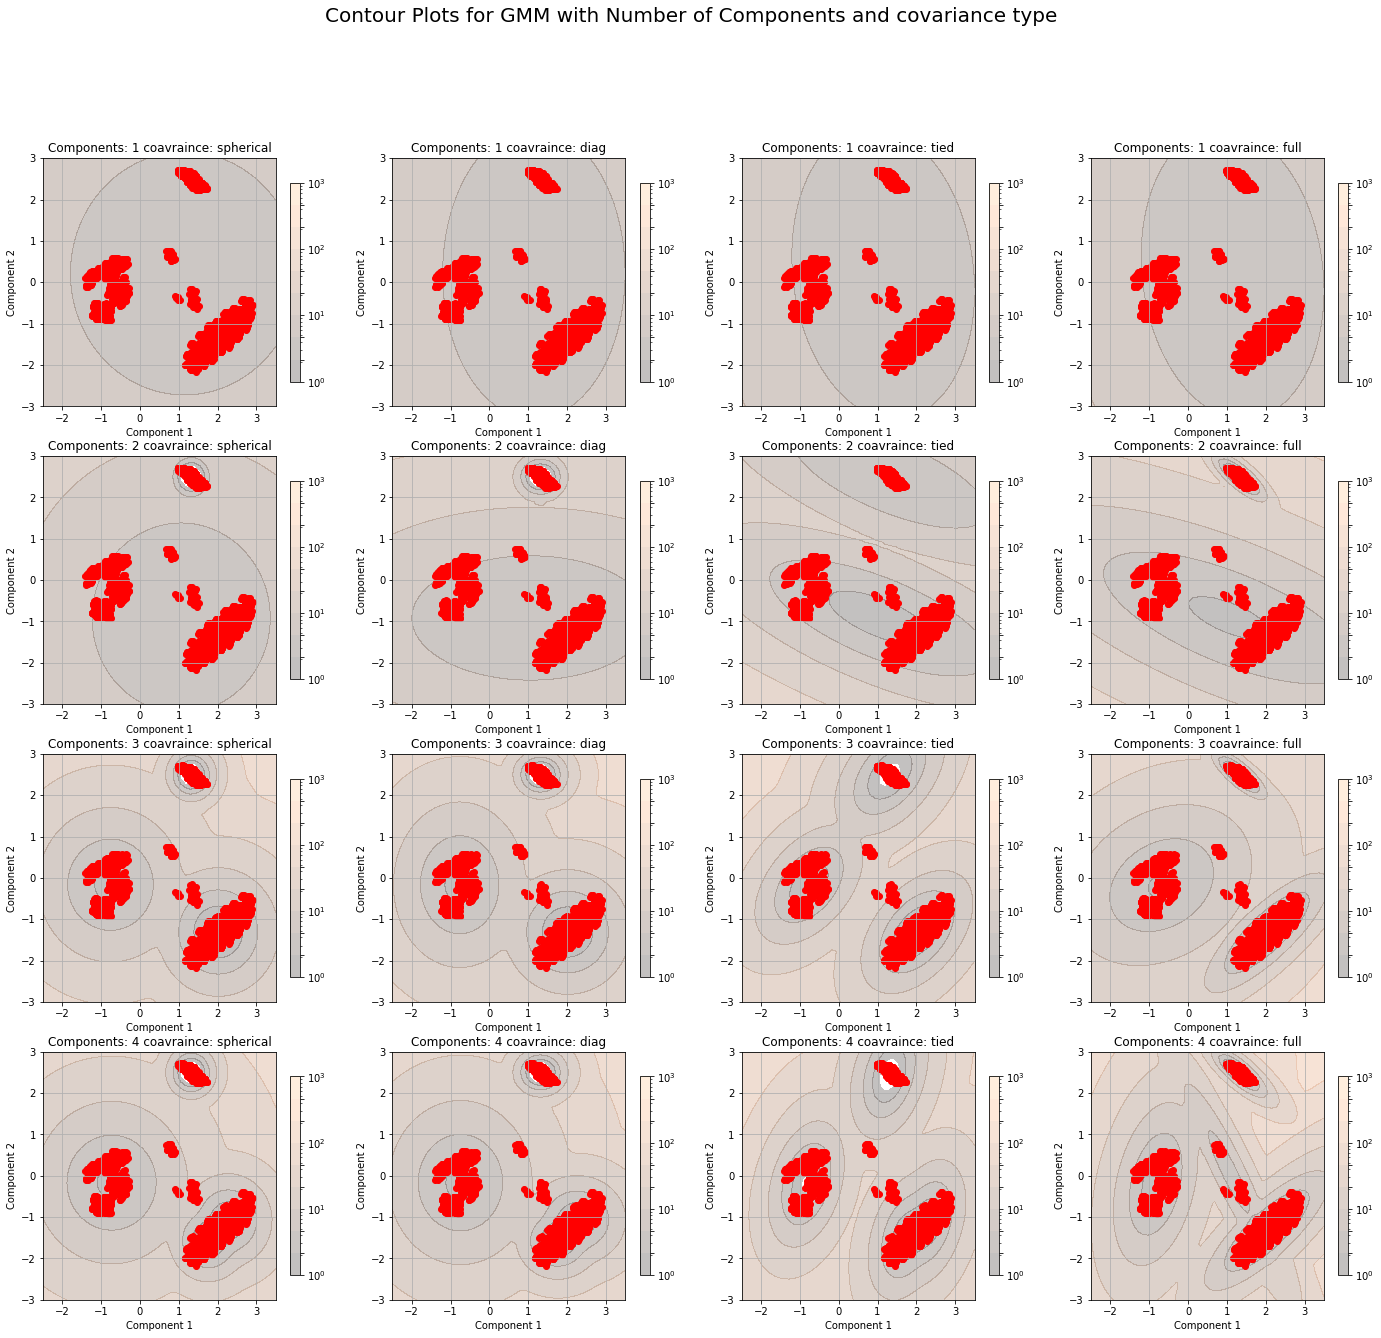

In [8]:
def Q4():
    ### STUDENT START ###
    pca = PCA(n_components=2)
    comp_res = pca.fit_transform(train_data)[train_labels==1] # consider only poisonous mushrooms
    
    covar_type = ['spherical', 'diag', 'tied', 'full']
    
    fig = plt.figure(figsize=(24, 21))
    loc_figure = 1 # init the location of the 1st plot
    fig.suptitle("Contour Plots for GMM with Number of Components and covariance type", size=20)
    
    for comp in range(1, 5): # n_components for GMM from 1 to 4
        for covar in covar_type:
            gmm = GaussianMixture(n_components=comp, covariance_type=covar, random_state=12345)
            gmm.fit(comp_res)
            
            # display predicted scores by the model as a contour plot (from the reference)
            x = np.linspace(-2.5, 3.5) # using the range (-4, 4) based on the component 1 value
            y = np.linspace(-3.0, 3.0) # being a bit lower than -2 and a bit higher than 3.
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gmm.score_samples(XX)
            Z = Z.reshape(X.shape)

            ax = fig.add_subplot(4, 4, loc_figure) # place plot on the 4x4 grid at the position
            loc_figure += 1                        # indicated by loc_figure.
            ax.set_xlabel("Component 1")
            ax.set_ylabel("Component 2")
           
            #CS = plt.contourf(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), 
            #                  levels=np.logspace(0, 3, 10), alpha=0.3, cmap='hot')
            
            # Use plt.contourf as this function fills in different shades as contours change
            CS = plt.contourf(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), 
                             levels=np.logspace(0, 3, 10), alpha=0.25, cmap='copper')
            CB = plt.colorbar(CS, shrink=0.8)
            plt.scatter(comp_res[:, 0], comp_res[:, 1], color="r", cmap='cool')
            
            plt.title("Components: " + str(comp) + " coavraince: " + covar)
            plt.grid()
            plt.axis("tight")
    ### STUDENT END ###

Q4()

Answer:

In general, a univariate Gaussian is fully determined by its mean and variance. In the multivariate case the variance is replaced by the variance-covariance, or simply covariance, matrix. The covariance determines the shape of the Gaussian function. If the variance is the same and only exists along the diagonal we get a circular (or spherical, or its higher dimension equivalent) shape. If the variance differs along diagonal then it's an ellipse. If the covariance is such that some or all of the off diagonal elements are non-zero (covariance matrix is symmetric across diagonal) then we get different shapes.

Covariance Type "Full" means that each component has its own general covariance matrix. This means that each component has its own shape and position. 

When we use covariance type "tied" then we get the same shape for each component but the shape itself isn't known. 

Specific to the case we've plotted let's consider the last 2 columns of the 4x4 matrix of contour plots above. 

When we've only 1 component we see that the 2 plots are identical (the 1st row and the last 2 columns).

Subsequently, when we come down the rows, where number of components go from 2 to 4 we see that the two plots (of "tied" vs "full") differ. The clusters with covariance type tied have almost same shape. The plots in the last column (corresponding to covariance type full) shows that each cluster has its own shape. 

### Question 5: Using Unsupervised models for classification...?
---

1. Fit two Gaussian mixture models:
  - On your 2d projected training data. 
    - Form a subset of all the poisonous examples and fit one GMM (gmm_poison).
    - Form a subset of all the non-poisonous examples and fit another GMM (gmm_nonpoison).
  - Use 4 mixture components and full convariance for each model.  
1. Use the above trained GMMs to classify examples in your test set:
   - For each example in the test set
     - Measure how likely it is to have been "generated" by gmm_poison and gmm_nonpoison (using score_samples).
     - Predict the more likely label.
  - You can use score_samples.
  - You can do this without a for loop which will be more efficient.
1. What is the accuracy of the predictions on the test data? (we expect it to be about 0.95)

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [9]:
def Q5():  
    ### STUDENT START ###
    pca = PCA(n_components=2)
    comp_train_res = pca.fit_transform(train_data)
    
    comp_test_res = pca.transform(test_data)
    
    poison_2d = comp_train_res[train_labels==1]
    nonpoison_2d = comp_train_res[train_labels==0]
    
    gmm_poison = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    gmm_nonpoison = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    
    gmm_poison.fit(poison_2d)
    gmm_nonpoison.fit(nonpoison_2d)
    
    ll_poison = gmm_poison.score_samples(comp_test_res) # get the log likelihood of the estimate
    ll_nonpoison = gmm_nonpoison.score_samples(comp_test_res)
    
    # gmm_pred will be 1 if the log likelihood of being poisonous is higher than that of 
    # being non-poisonous. Multiply by 1 to convert True to 1 and False to 0.
    gmm_pred = (ll_poison > ll_nonpoison) * 1 
    
    correct_pred = np.sum((gmm_pred == test_labels) * 1)
    
    accuracy = correct_pred / gmm_pred.shape
    
    print("Accuracy:", round(accuracy[0], 7))

    ### STUDENT END ###

Q5()

Accuracy: 0.9501779


### Question 6: Understanding the GMM parameters
---

1. Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.
1. Print the best configuration and accuracy.
1. Plot a scatter plot of accuracy vs #params.
1. Bonus: Provide a better visualization by showing all four: accuracy, number of parameters, the covariance type and the number of PCA dimensions.



Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* [This spreadsheet](https://docs.google.com/spreadsheets/d/1LTEOU7q_Tgs4bX_3o2ePjDQrTRToZoc1J5XLlaRbmI0/edit?usp=sharing) should help (accessible from your google @berkeley.edu account)

* Spherical - Each GMM component has a mean per dimension, and one variance. 
* Diag - Each GMM component has a mean per dimension and a variance for each dimension.
* full - Each GMM component has a mean per dimension and a "full" covariance matrix. Only the covariance matrix is symmetric, so its $[i,j]$ entry would equal to its $[j,i]$ entry.
* tied - Finally, tied has all components share a single covariance matrix. So each GMM component has a mean per dimension but they all share the same 'full' covariance matrix.

Max accuracy obatined:  0.97331
    Optimal PCA component: 7
    Optimal GMM component: 3
    Optimal Covariance type: spherical
    Number of parameters: 48


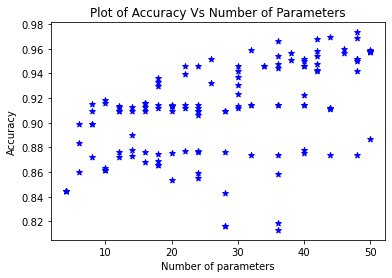

     PCA_Components  GMM_Components Covariance_type  Parameters  Accuracy
125               7               3       spherical        48.0  0.973310
108               4               3            tied        44.0  0.969751
119               5               4       spherical        48.0  0.968861
122               6               3       spherical        42.0  0.967972
118               5               3       spherical        36.0  0.966192
..              ...             ...             ...         ...       ...
100               4               1            diag        28.0  0.843416
86                3               2            full        36.0  0.818505
101               4               1            tied        28.0  0.816726
102               4               1            full        28.0  0.816726
104               4               2            diag        36.0  0.813167

[134 rows x 5 columns]


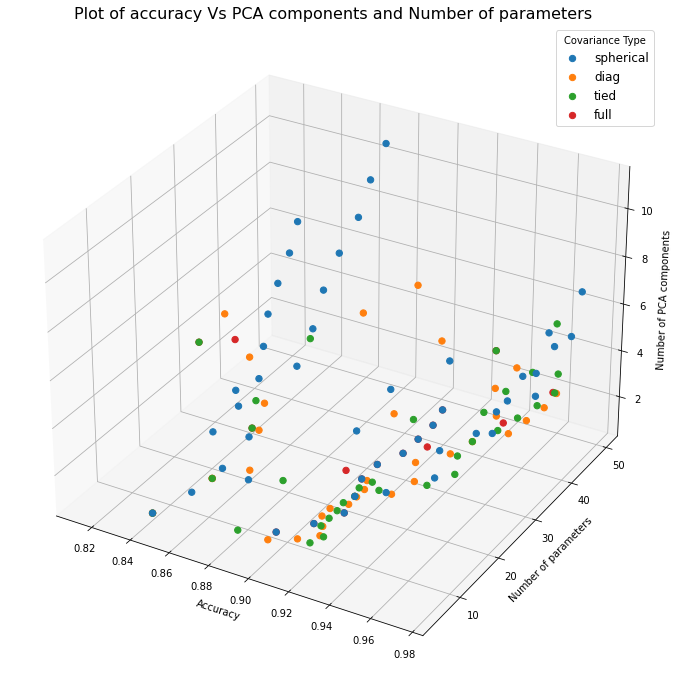

In [10]:
from matplotlib.lines import Line2D

def Q6():
    ### STUDENT START ###
    # parameter calculation logic from the spreadsheet
    # nclasses = 2 in the case we're considering
    # spherical: (n_pca*n_gmm + n_gmm) * n_classes
    # diagonal: (n_pca*n_gmm + n_pca * n_gmm) * n_classes
    # full: (n_pca*n_gmm + n_pca (n_pca + 1)/ 2 * n_gmm) * n_classe
    # tied: (n_pca*n_gmm + n_pca (n_pca + 1)/ 2) * n_classes
    
    covar_type = ['spherical', 'diag', 'tied', 'full']
    accuracy_list = []
    n_pca_list = []
    n_gmm_list = []
    covar_list = []
    params_list = []
    
    for n_pca in range(1,12):
        for n_gmm in range(1, 12):
            for covar in covar_type:
                if covar == 'spherical':
                    params = (n_pca * n_gmm + n_gmm) * 2
                elif covar == 'diagonal':
                    params = (n_pca * n_gmm + n_pca * n_gmm) * 2
                elif covar == 'full':
                    params = (n_pca * n_gmm + n_pca * (n_pca + 1) / 2 * n_gmm) * 2
                else:
                    params = (n_pca * n_gmm + n_pca * (n_pca + 1)/ 2) * 2
                
                if params > 50:
                    continue
                
                pca = PCA(n_components=n_pca)
                train_res = pca.fit_transform(train_data)
                test_res = pca.transform(test_data)
                                
                poison_2d = train_res[train_labels==1]
                nonpoison_2d = train_res[train_labels==0]
                                
                gmm_poison = GaussianMixture(n_components=n_gmm, 
                                             covariance_type=covar, random_state=12345)
                gmm_nonpoison = GaussianMixture(n_components=n_gmm, 
                                                covariance_type=covar, random_state=12345)
                
                gmm_poison.fit(poison_2d)
                gmm_nonpoison.fit(nonpoison_2d)
                
                ll_poison = gmm_poison.score_samples(test_res) 
                ll_nonpoison = gmm_nonpoison.score_samples(test_res)
                
                gmm_pred = (ll_poison > ll_nonpoison) * 1
                    
                correct_pred = np.sum((gmm_pred == test_labels) * 1)
                
                accuracy = correct_pred / gmm_pred.shape
                
                accuracy_list.append(round(accuracy[0], 6))
                n_pca_list.append(n_pca)
                n_gmm_list.append(n_gmm)
                covar_list.append(covar)
                params_list.append(params)
                       
    df = pd.DataFrame({'PCA_Components': n_pca_list,
                      'GMM_Components': n_gmm_list,
                      'Covariance_type': covar_list,
                      'Parameters': params_list,
                      'Accuracy': accuracy_list})
    df = df.sort_values(by='Accuracy', ascending=False)
    
    max_accuracy = max(accuracy_list)
    ind = accuracy_list.index(max_accuracy)
    best_pca = n_pca_list[ind]
    best_gmm = n_gmm_list[ind]
    best_covar = covar_list[ind]
    best_param = params_list[ind]
    
    print("Max accuracy obatined: ", max_accuracy)
    print("    Optimal PCA component:", best_pca)
    print("    Optimal GMM component:", best_gmm)
    print("    Optimal Covariance type:", best_covar)
    print("    Number of parameters:", best_param)
    
    plt.scatter(params_list, accuracy_list, color='b', marker='*')
    plt.xlabel("Number of parameters")
    plt.ylabel("Accuracy")
    plt.title("Plot of Accuracy Vs Number of Parameters", fontsize=12)
    plt.show()
    
    print(df)
    
    # visualize accuracy againt number of parameters and components for PCA
    # do it in a 3-D graph for each covariance type
    fig = plt.figure(figsize=(12, 12))
    ax = plt.axes(projection ='3d')

    for covar in covar_type:
        data = df.loc[df['Covariance_type'] == covar]
        ax.scatter(data['Accuracy'], data['Parameters'], data['PCA_Components'], 
                   label=covar, alpha=1, s=40)
    
    ax.legend(title="Covariance Type", fontsize=12)
    ax.set_title("Plot of accuracy Vs PCA components and Number of parameters",
                fontsize=16)
    ax.set_zlabel("Number of PCA components")
    ax.set_ylabel("Number of parameters")
    ax.set_xlabel("Accuracy")
    plt.show()
    ### STUDENT END ###

Q6()